In [1]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

2.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12949756659201252810
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6300696576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17668125734087954158
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:0a:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
import numpy as np
import pandas as pd 

from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
from pyts.preprocessing import MinMaxScaler
from pyts.approximation import PiecewiseAggregateApproximation
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from pyts.image import MarkovTransitionField
import os
import cv2

In [4]:
import sys

from matplotlib import gridspec
import tsia.plot
import tsia.markov
import tsia.network_graph

In [5]:
list_csv_Current_Normal = []
list_csv_Current_Porosity = []
list_csv_Current_Humping = []
list_csv_Voltage_Normal =[]
list_csv_Voltage_Porosity= []
list_csv_Voltage_Humping = []

In [6]:
# Current Normal
for i in os.listdir('E:/Data/ver.3.21/Current'):
    if i.endswith('0.csv'):
        csv_Current_Normal =pd.read_csv('E:/Data/ver.3.21/Current' +'/' + i)
        csv_Current_Normal = csv_Current_Normal.T
        csv_Current_Normal = np.array(csv_Current_Normal, dtype=float)

        for k in range(int(len(csv_Current_Normal.T)/300)):
            csv_Current_Normal_ = csv_Current_Normal[:, k*300:(300+(300*k))]
            list_csv_Current_Normal.append(csv_Current_Normal_)

# Current Porosity
for i in os.listdir('E:/Data/ver.3.21/Current'):
    if i.endswith('1.csv'):
        csv_Current_Porosity =pd.read_csv('E:/Data/ver.3.21/Current' +'/' + i)
        csv_Current_Porosity = csv_Current_Porosity.T
        csv_Current_Porosity = np.array(csv_Current_Porosity, dtype=float)

        for k in range(int(len(csv_Current_Porosity.T)/300)):
            csv_Current_Porosity_ = csv_Current_Porosity[:, k*300:(300+(300*k))]
            list_csv_Current_Porosity.append(csv_Current_Porosity_)

 # Current Humping
for i in os.listdir('E:/Data/ver.3.21/Current'):
    if i.endswith('2.csv'):
        csv_Current_Humping =pd.read_csv('E:/Data/ver.3.21/Current' +'/' + i)
        csv_Current_Humping = csv_Current_Humping.T
        csv_Current_Humping = np.array(csv_Current_Humping, dtype=float)

        for k in range(int(len(csv_Current_Humping.T)/300)):
            csv_Current_Humping_ = csv_Current_Humping[:, k*300:(300+(300*k))]
            list_csv_Current_Humping.append(csv_Current_Humping_)

# Voltage Normal
for i in os.listdir('E:/Data/ver.3.21/Voltage'):
    if i.endswith('0.csv'):
        csv_Voltage_Normal = pd.read_csv('E:/Data/ver.3.21/Voltage' + '/' + i)
        csv_Voltage_Normal = csv_Voltage_Normal.T
        csv_Voltage_Normal = np.array(csv_Voltage_Normal, dtype=float)

        for k in range(int(len(csv_Voltage_Normal.T)/300)):
            csv_Voltage_Normal_ = csv_Voltage_Normal[:, k*300 : (300+(300*k))]
            list_csv_Voltage_Normal.append(csv_Voltage_Normal_)

# Voltage Porosity
for i in os.listdir('E:/Data/ver.3.21/Voltage'):
    if i.endswith('1.csv'):
        csv_Voltage_Porosity = pd.read_csv('E:/Data/ver.3.21/Voltage' + '/' + i)
        csv_Voltage_Porosity = csv_Voltage_Porosity.T
        csv_Voltage_Porosity = np.array(csv_Voltage_Porosity, dtype=float)

        for k in range(int(len(csv_Voltage_Porosity.T)/300)):
            csv_Voltage_Porosity_ = csv_Voltage_Porosity[:, k*300 : (300+(300*k))]
            list_csv_Voltage_Porosity.append(csv_Voltage_Porosity_)

# Voltage Humping
for i in os.listdir('E:/Data/ver.3.21/Voltage'):
    if i.endswith('2.csv'):
        csv_Voltage_Humping = pd.read_csv('E:/Data/ver.3.21/Voltage' + '/' + i)
        csv_Voltage_Humping = csv_Voltage_Humping.T
        csv_Voltage_Humping = np.array(csv_Voltage_Humping, dtype=float)

        for k in range(int(len(csv_Voltage_Humping.T)/300)):
            csv_Voltage_Humping_ = csv_Voltage_Humping[:, k*300 : (300+(300*k))]
            list_csv_Voltage_Humping.append(csv_Voltage_Humping_)

In [7]:
data_Current_Normal = np.array(list_csv_Current_Normal)
data_Current_Porosity = np.array(list_csv_Current_Porosity)
data_Current_Humping = np.array(list_csv_Current_Humping)

data_Voltage_Normal = np.array(list_csv_Voltage_Normal)
data_Voltage_Porosity = np.array(list_csv_Voltage_Porosity)
data_Voltage_Humping = np.array(list_csv_Voltage_Humping)

print(data_Current_Normal.shape)
print(data_Current_Porosity.shape)
print(data_Current_Humping.shape)
print(data_Voltage_Normal.shape)
print(data_Voltage_Porosity.shape)
print(data_Voltage_Humping.shape)

(1000, 1, 300)
(1000, 1, 300)
(1000, 1, 300)
(1000, 1, 300)
(1000, 1, 300)
(1000, 1, 300)


In [8]:
list_y_Normal =[]
list_y_Porosity =[]
list_y_Humping =[]

for i in range(len(data_Current_Normal)):
    list_y_Normal.append(0)

for i in range(len(data_Current_Porosity)):
    list_y_Porosity.append(1)

for i in range(len(data_Current_Humping)):
    list_y_Humping.append(2)

data_y_Normal = np.array(list_y_Normal)
data_y_Porosity = np.array(list_y_Porosity)
data_y_Humping = np.array(list_y_Humping)

print(data_y_Normal.shape)
print(data_y_Porosity.shape)
print(data_y_Humping.shape)

(1000,)
(1000,)
(1000,)


In [9]:
#Markov Transition Fields

n_bins = 8
strategy = 'quantile'

# Current_Normal
list_MTF_Current_Normal =[]
for i in range(len(data_Current_Normal)):
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy= strategy)

    MTF_Current_Normal = transformer.transform(data_Current_Normal[i])
    MTF_Current_Normal = MTF_Current_Normal.reshape(300,300)
    list_MTF_Current_Normal.append(MTF_Current_Normal)

# Current_Porosity
list_MTF_Current_Porosity =[]
for i in range(len(data_Current_Porosity)):
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy= strategy)

    MTF_Current_Porosity = transformer.transform(data_Current_Porosity[i])
    MTF_Current_Porosity = MTF_Current_Porosity.reshape(300,300)
    list_MTF_Current_Porosity.append(MTF_Current_Porosity)

# Current_Humping
list_MTF_Current_Humping=[]
for i in range(len(data_Current_Humping))    :
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy=strategy)

    MTF_Current_Humping = transformer.transform(data_Current_Humping[i])
    MTF_Current_Humping = MTF_Current_Humping.reshape(300,300)
    list_MTF_Current_Humping.append(MTF_Current_Humping)

# Voltage_Normal
list_MTF_Voltage_Normal =[]
for i in range(len(data_Voltage_Normal)):
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy=strategy)

    MTF_Voltage_Normal = transformer.transform(data_Voltage_Normal[i])
    MTF_Voltage_Normal = MTF_Voltage_Normal.reshape(300,300)
    list_MTF_Voltage_Normal.append(MTF_Voltage_Normal)

# Voltage_Porosity
list_MTF_Voltage_Porosity =[]
for i in range(len(data_Voltage_Porosity)):
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy=strategy)

    MTF_Voltage_Porosity = transformer.transform(data_Voltage_Porosity[i])
    MTF_Voltage_Porosity = MTF_Voltage_Porosity.reshape(300,300)
    list_MTF_Voltage_Porosity.append(MTF_Voltage_Porosity)

# Voltage_Humping
list_MTF_Voltage_Humping =[]
for i in range(len(data_Voltage_Humping)):
    transformer = MarkovTransitionField(image_size=1.0, n_bins=n_bins, strategy=strategy)

    MTF_Voltage_Humping = transformer.transform(data_Voltage_Humping[i])
    MTF_Voltage_Humping = MTF_Voltage_Humping.reshape(300,300)
    list_MTF_Voltage_Humping.append(MTF_Voltage_Humping)

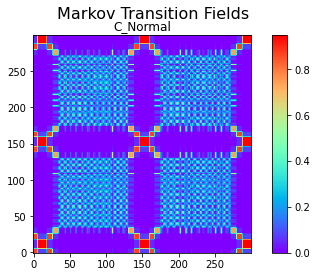

In [18]:
Normal = np.array(list_MTF_Current_Normal)
Normal = Normal[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[Normal]
titles = ['C_Normal']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/C_Normal')
plt.show()

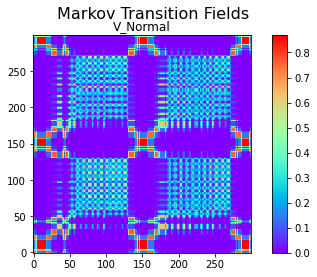

In [19]:
Voltage = np.array(list_MTF_Voltage_Normal)
Voltage = Voltage[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[Voltage]
titles = ['V_Normal']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/V_Normal')
plt.show()

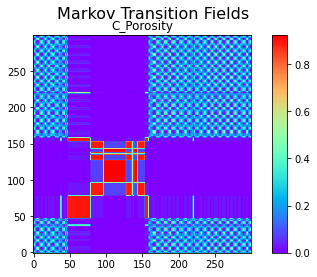

In [20]:
C_Porosity = np.array(list_MTF_Current_Porosity)
C_Porosity = C_Porosity[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[C_Porosity]
titles = ['C_Porosity']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/C_Porosity')
plt.show()

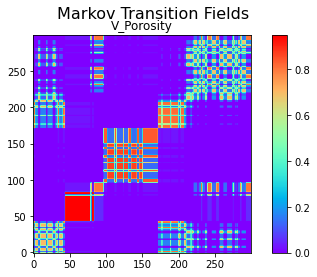

In [21]:
V_Porosity = np.array(list_MTF_Voltage_Porosity)
V_Porosity = V_Porosity[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[V_Porosity]
titles = ['V_Porosity']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/V_Porosity')
plt.show()

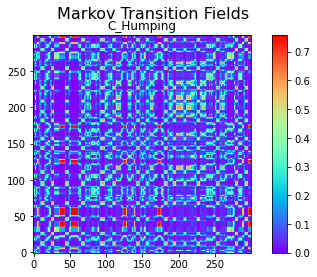

In [16]:
C_Humping = np.array(list_MTF_Current_Humping)
C_Humping = C_Humping[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[C_Humping]
titles = ['C_Humping']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/C_Humping')
plt.show()

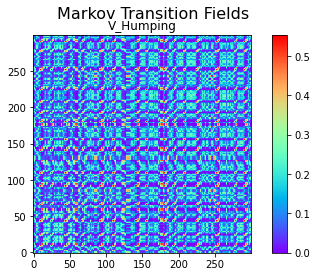

In [17]:
V_Humping = np.array(list_MTF_Voltage_Humping)
V_Humping = V_Humping[1].reshape(300,300)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8,4))
grid = ImageGrid(fig, 111, nrows_ncols=(1,1),cbar_location ='right', cbar_mode='single', cbar_size="7%", cbar_pad=0.3)

images=[V_Humping]
titles = ['V_Humping']

for image,title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin = 'lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Markov Transition Fields', y=0.98, fontsize=16)
plt.savefig('E:/Data/ver.3.22/V_Humping')
plt.show()

In [18]:
#Image directory 생성
os.mkdir('C:/3.19/MTF' +'/' + 'Image')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Current_Normal')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Current_Porosity')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Current_Humping')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Voltage_Normal')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Voltage_Porosity')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Voltage_Humping')

In [19]:
from PIL import Image
import cv2

for i in range(0,len(list_MTF_Current_Normal)):
    image_C_N = Image.fromarray((list_MTF_Current_Normal[i]))
    image_C_N.save('C:/3.19/MTF/Image/Current_Normal/'+ f'N_{i}.tiff')  

for i in range(0,len(list_MTF_Current_Porosity)):
    image_C_P = Image.fromarray((list_MTF_Current_Porosity[i]))
    image_C_P.save('C:/3.19/MTF/Image/Current_Porosity/'+ f'P_{i}.tiff')     

for i in range(0,len(list_MTF_Current_Humping)):
    image_C_H = Image.fromarray((list_MTF_Current_Humping[i]))
    image_C_H.save('C:/3.19/MTF/Image/Current_Humping/'+ f'H_{i}.tiff')

for i in range(0, len(list_MTF_Voltage_Normal)):
    image_V_N = Image.fromarray(list_MTF_Voltage_Normal[i])
    image_V_N.save('C:/3.19/MTF/Image/Voltage_Normal/' + f'N_{i}.tiff')

for i in range(0, len(list_MTF_Voltage_Porosity)):
    image_V_P = Image.fromarray(list_MTF_Voltage_Porosity[i])
    image_V_P.save('C:/3.19/MTF/Image/Voltage_Porosity/' + f'P_{i}.tiff')

for i in range(0, len(list_MTF_Voltage_Humping)):
    image_V_P = Image.fromarray(list_MTF_Voltage_Humping[i])
    image_V_P.save('C:/3.19/MTF/Image/Voltage_Humping/' + f'H_{i}.tiff')

[[ 0.      62.23481 57.91832 ... 41.84422 42.68175 40.23359]
 [62.23481  0.       4.31649 ... 20.39059 19.55306 22.00122]
 [57.91832  4.31649  0.      ... 16.0741  15.23657 17.68473]
 ...
 [41.84422 20.39059 16.0741  ...  0.       0.83753  1.61063]
 [42.68175 19.55306 15.23657 ...  0.83753  0.       2.44816]
 [40.23359 22.00122 17.68473 ...  1.61063  2.44816  0.     ]]


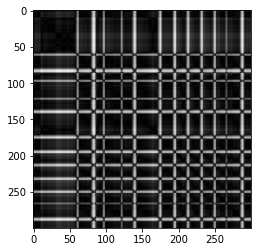

In [20]:
import matplotlib.image as img
import matplotlib.pyplot as plt

im = Image.open('C:/3.19/RP/Image/Current_Normal/'+ 'N_0.tiff') # 이미지 불러오기.

pix = np.array(im)
print(pix)
plt.imshow(pix,cmap='gray')


im.show() # 이미지 보여주기

im.show() # 이미지 보여주기

In [21]:
list_C_N = []
list_C_P =[]
list_C_H = []
list_V_N = []
list_V_P = []
list_V_H = []

for i in range(0,len(list_MTF_Current_Normal)):
    C_N = Image.open('C:/3.19/MTF/Image/Current_Normal/'+ f'N_{i}.tiff') 
    C_N = np.array(C_N)
    C_N = C_N.reshape(300,300,1)
    list_C_N.append(C_N)

    C_P = Image.open('C:/3.19/MTF/Image/Current_Porosity/'+ f'P_{i}.tiff') 
    C_P = np.array(C_P)
    C_P = C_P.reshape(300,300,1)
    list_C_P.append(C_P)

    C_H = Image.open('C:/3.19/MTF/Image/Current_Humping/'+ f'H_{i}.tiff') 
    C_H = np.array(C_H)
    C_H = C_H.reshape(300,300,1)
    list_C_H.append(C_H)

    V_N = Image.open('C:/3.19/MTF/Image/Voltage_Normal/'+ f'N_{i}.tiff') 
    V_N = np.array(V_N)
    V_N = V_N.reshape(300,300,1)
    list_V_N.append(V_N)

    V_P = Image.open('C:/3.19/MTF/Image/Voltage_Porosity/'+ f'P_{i}.tiff') 
    V_P = np.array(V_P)
    V_P = V_P.reshape(300,300,1)
    list_V_P.append(V_P)

    V_H = Image.open('C:/3.19/MTF/Image/Voltage_Humping/'+ f'H_{i}.tiff') 
    V_H = np.array(V_H)
    V_H = V_H.reshape(300,300,1)
    list_V_H.append(V_H)
    


In [22]:
print(C_N.shape)
print(C_P.shape)
print(C_H.shape)
print(V_N.shape)
print(V_P.shape)
print(V_H.shape)

(300, 300, 1)
(300, 300, 1)
(300, 300, 1)
(300, 300, 1)
(300, 300, 1)
(300, 300, 1)


In [23]:
print(len(list_C_N))
print(len(list_C_P))
print(len(list_C_H))
print(len(list_V_N))
print(len(list_V_P))
print(len(list_V_H))

1000
1000
1000
1000
1000
1000


In [24]:
list_Merge_Normal = []
list_Merge_Porosity = []
list_Merge_Humping = []

for i in range(len(data_Current_Normal)):
  Merge_Normal = np.concatenate((list_C_N[i],list_V_N[i]), axis = 2)
  list_Merge_Normal.append(Merge_Normal)

    
for i in range(len(data_Current_Porosity)):
  Merge_Porosity = np.concatenate((list_C_P[i],list_V_P[i]), axis = 2)
  list_Merge_Porosity.append(Merge_Porosity)

for i in range(len(data_Current_Humping)):
  Merge_Humping = np.concatenate((list_C_H[i], list_V_H[i]), axis = 2)
  list_Merge_Humping.append(Merge_Humping)

Normal = np.array(list_Merge_Normal)
print(Normal.shape)

Porosity = np.array(list_Merge_Porosity)
print(Porosity.shape)

Humping = np.array(list_Merge_Humping)
print(Porosity.shape)

(1000, 300, 300, 2)
(1000, 300, 300, 2)
(1000, 300, 300, 2)


In [25]:
#Merge_Image Folder 생성
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Merge_Normal')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Merge_Porosity')
os.mkdir('C:/3.19/MTF/Image' +'/' + 'Merge_Humping')

In [26]:
#Image_Merge Save

for i in range(0,len(Normal)):
    image = Image.fromarray((Normal[i]*255).astype(np.uint8))
    image.save('C:/3.19/MTF/Image/Merge_Normal/'+ f'N_{i}.tiff')  
    
for i in range(0,len(Porosity)):
    image = Image.fromarray((Porosity[i]*255).astype(np.uint8))
    image.save('C:/3.19/MTF/Image/Merge_Porosity/'+ f'P_{i}.tiff')

for i in range(0,len(Humping)):
    image = Image.fromarray((Humping[i]*255).astype(np.uint8))
    image.save('C:/3.19/MTF/Image/Merge_Humping/'+ f'H_{i}.tiff')   

In [27]:
list_Normal_index = []
list_Porosity_index = []
list_Humping_index = []

for i in range(len(data_Current_Normal)):
    list_Normal_index.append('N_'+str(i))

for j in range(len(data_Current_Porosity)):
    list_Porosity_index.append('P_'+str(j))

for k in range(len(data_Current_Humping)):
    list_Humping_index.append('H_' + str(k))

Normal_index = np.array(list_Normal_index)
Porosity_index = np.array(list_Porosity_index)
Humping_index = np.array(list_Humping_index)

print(Normal_index.shape)
print(Porosity_index.shape)
print(Humping_index.shape)

(1000,)
(1000,)
(1000,)


In [29]:
Welding_data = np.concatenate([Normal, Porosity, Humping])

label_data = np.concatenate([data_y_Normal, data_y_Porosity, data_y_Humping])

index_data = np.concatenate([Normal_index, Porosity_index, Humping_index])

tmp = [[x,y,z] for x,y,z in zip(Welding_data, label_data, index_data)]

import random
random.shuffle(tmp)

X_data = [n[0] for n in tmp]
y_data = [n[1] for n in tmp]
i_data = [n[2] for n in tmp]

X_data = np.array(X_data)
y_data = np.array(y_data)
i_data = np.array(i_data)

np.savez('C:/3.19/MTF/MTF', X_data=X_data, y_data=y_data, i_data = i_data)

In [30]:
print(X_data.shape)
print(y_data.shape)
print(i_data.shape)

(3000, 300, 300, 2)
(3000,)
(3000,)
